# >>>> IMPLEMNTING A KNN MODEL TO CLASSIFY THE ANIMALS IN TO CATEGORIE <<<<

# IMPORT LIBRARIES


In [163]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd
from pandas import read_csv

# NUMPY USED FOR MATHEMATICAL OPERATION
import numpy as np

# SKLEARN IS USED TO BUILD MACHINE LEARNING MODELS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
!pip install category_encoders

# WARNINGS GETS IGNORED
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [164]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\Zoo.csv")

In [165]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

# DATA UNDERSTANDING

In [166]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [167]:
df.shape

(101, 18)

In [168]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [169]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [170]:
df1= df.drop('animal name', axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [171]:
df1.shape

(101, 17)

In [172]:
X = df1.iloc[:, 0:17]
Y = df1['type']

In [173]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [174]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# SPLITTING DATA INTO TRAINING  AND TESTING DATA

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=40)

# KNN CLASSIFICATION

In [176]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

# MODEL TESTING

In [178]:
y_pred = classifier.predict(x_test)

In [179]:
y_test

80     3
75     1
63     1
15     7
38     4
11     2
40     6
45     1
39     6
62     3
84     1
4      1
47     1
27     1
76     3
17     1
87     2
33     2
9      1
93     1
72     7
66     1
100    2
68     1
26     5
69     1
78     2
2      4
77     7
81     7
20     2
Name: type, dtype: int64

In [180]:
y_pred


array([2, 1, 1, 7, 4, 2, 6, 1, 6, 2, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 6, 1,
       2, 1, 5, 1, 2, 4, 7, 6, 2], dtype=int64)

In [181]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [182]:
print(cm)

[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  2  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  2  2]]


In [183]:
print(ac)

0.8387096774193549


# INFERENCE

As our accuracy is 83%. Our model is performing well.

# ==============================================================================

# >>>> PREPARING A MODEL FOR GLASS CLASSIFICATION USING KNN DATA <<<<

# IMPORT LIBRARIES

In [184]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# NUMPY USED FOR MATHEMATICAL OPERATION
import numpy as np

# MATPLOTLIB IS USED FOR VISUALIZATION PURPORSE
import matplotlib.pyplot as plt

# SEABORN IS USED FOR ADVANCED VISULIZATION
import seaborn as sns

# SKLEARN IS USED TO BUILD MACHINE LEARNING MODELS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# IMPORT DATA

In [185]:
glass= pd.read_csv("C:\\Users\\DELL\\Downloads\\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA & DATA PREPROCESSING

In [186]:
glass.shape

(214, 10)

In [187]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [188]:
glass.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2


In [189]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [190]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [191]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [192]:
# Checking how many types of glass are present in dataset
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

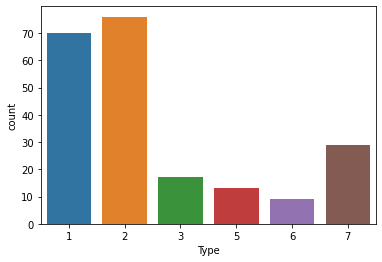

In [193]:
sns.countplot(x = 'Type', data = glass)

## CORRELATION ANALYSIS

<AxesSubplot:>

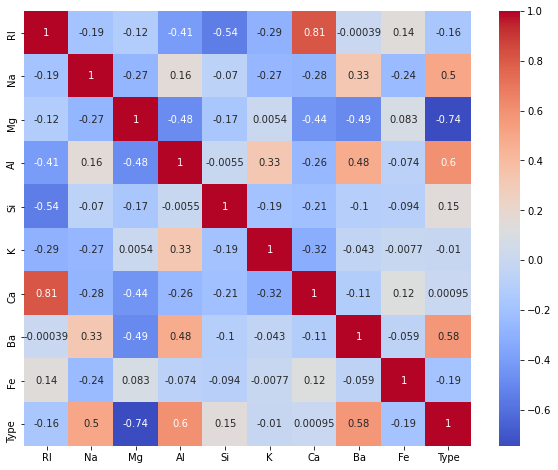

In [194]:
# Correlation heat map to see the relation between different parameters
plt.figure(figsize=(10,8))
sns.heatmap(glass.corr(),annot=True,cmap='coolwarm')

In [ ]:
# plotting pairplot
sns.pairplot(glass)

In [ ]:
# Visualizing the content of different elements in the various types of glass
sns.stripplot(x='Type',y='RI',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Na',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Mg',data=glass)


In [ ]:
sns.stripplot(x='Type',y='Al',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Si',data=glass)

In [ ]:
sns.stripplot(x='Type',y='K',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Ca',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Ba',data=glass)

In [ ]:
sns.stripplot(x='Type',y='Fe',data=glass)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(glass.drop('Type',axis=1))

In [ ]:
scaled_features=scaler.transform(glass.drop('Type',axis=1))
glass_head=pd.DataFrame(scaled_features,columns=glass.columns[:-1])

In [ ]:
scaled_features=scaler.transform(glass.drop('Type',axis=1))
glass_head=pd.DataFrame(scaled_features,columns=glass.columns[:-1])

In [ ]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(glass_head,glass['Type'], test_size=0.3, random_state=42)

In [ ]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

# BUILDING KNN MODEL

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)


In [ ]:
pred

In [ ]:
pred_glass = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_glass

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

In [ ]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('error_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error_rate')

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

In [ ]:
pred=knn.predict(x_test)

In [ ]:
pred

In [ ]:
pred_glass = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_glass

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

In [ ]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

We can see that accuracy is improved when K=1

In [ ]:
sns.countplot(pred)